## Import Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and run the dataset

In [2]:
data=pd.read_csv(r"C:\Users\Gandharvi\OneDrive\Documents\dataset\Salary_dataset.csv",index_col=0)
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


## Data information.

In [3]:
data.shape

(30, 2)

#### *There are 30 rows and 20 columns.*

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [4]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### *The datatype is float64*

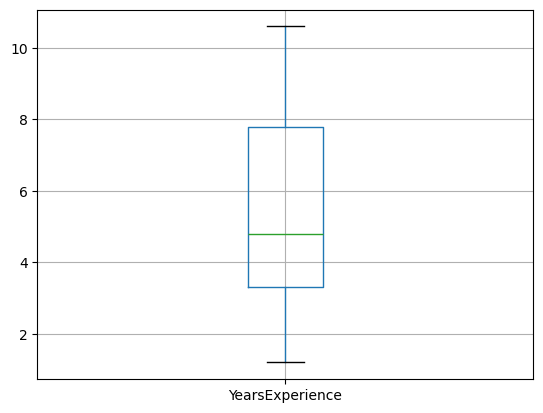

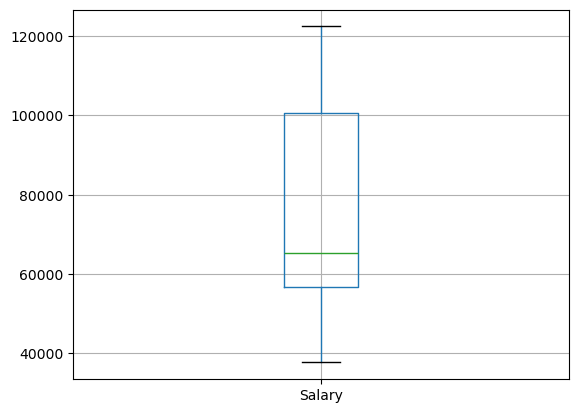

In [6]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

#### There are no outliers in the dataset.

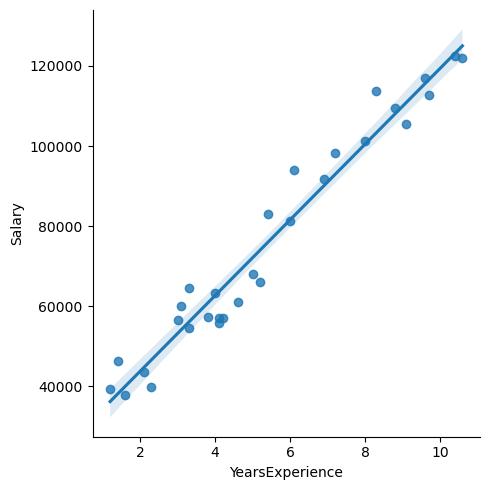

In [7]:
sns.lmplot(data=data,x='YearsExperience',y='Salary')
plt.show()

#### *Here, Years of experience is showing linear relationship with salary.*

In [5]:
# split the data and store it in X and Y
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

#### *X contains the train data and Y contains the test data.*

In [6]:
x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


C:\Users\Gandharvi\AppData\Local\Temp\ipykernel_30184\2662093251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


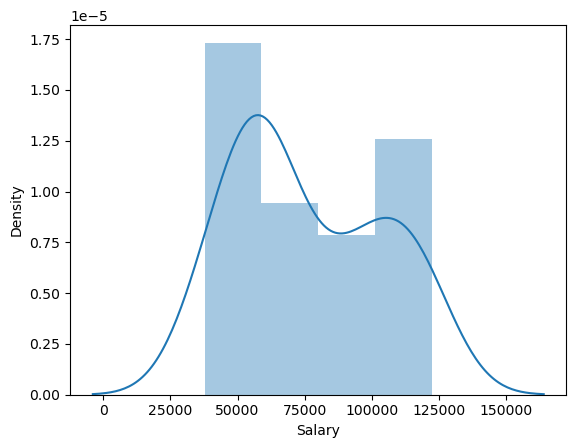

In [7]:
sns.distplot(y)
plt.show()

#### *Here, Salary follows approximate normal distribution.*

In [11]:
from scipy.stats import skew
skew(y)

np.float64(0.3361618825592921)

#### *The skewness is 0.3361 which is in the range of acceptance.*

## Load the library for train and test.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(10, 1)
(20,)
(10,)


## Load the model

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)

25882.597999718942
[9345.94244312]


####  *Here, we build the linear model and the intercept we got is '25882.597999718942' and coefficient is '[9345.94244312]'.*

In [15]:
x1=1.5
ypred=25882.597999718942+(9345.94244312*x1)
ypred

39901.511664398946

#### *Here we inserted the values for point of intercept and coefficient in the formula and we got the y predict as 39901.511664398946.*

In [33]:
x_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)
y_test_pred

array([ 40836.10590871, 123080.39940819,  65135.55626083,  63266.36777221,
       115603.64545369, 108126.8914992 , 116538.23969801,  64200.96201652,
        76350.68719258, 100650.1375447 ])

#### *First we prdict on train data and then on unseen data which values are stored in y_test_pred.*

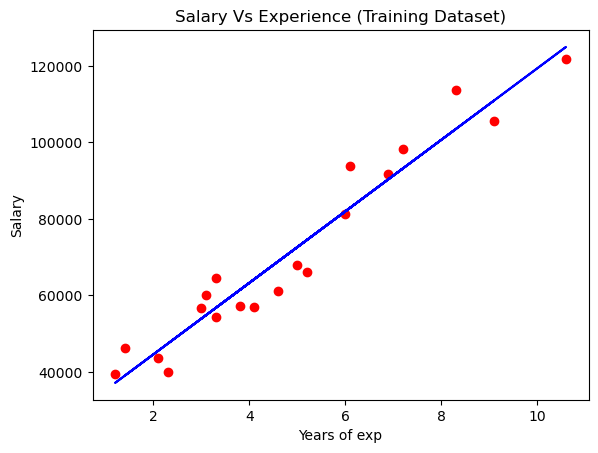

In [35]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,x_train_pred,color="blue")
plt.title("Salary Vs Experience (Training Dataset)")
plt.xlabel("Years of exp")
plt.ylabel("Salary")
plt.show()

#### *The red dots shows the actual training data point and blue line that is regression line whic is predicted salary from the model.*

In [36]:
import pandas as pd
result_df=pd.DataFrame({'Experience':x_test.squeeze(),"Actual Salary":y_test,"Predicted salary":y_test_pred})
result_df=result_df.reset_index(drop="index")

In [37]:
result_df

,Experience,Actual Salary,Predicted salary
0,1.6,37732.0,40836.105909
1,10.4,122392.0,123080.399408
2,4.2,57082.0,65135.556261
3,4.0,63219.0,63266.367772
4,9.6,116970.0,115603.645454
5,8.8,109432.0,108126.891499
6,9.7,112636.0,116538.239698
7,4.1,55795.0,64200.962017
8,5.4,83089.0,76350.687193
9,8.0,101303.0,100650.137545


#### *Here, we created a dataframe and in that we stored the result values of experience, actual salary and predicted salary.*

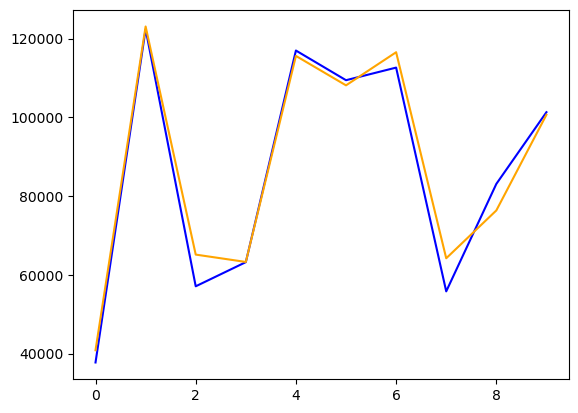

In [38]:
result_df["Actual Salary"].plot(color="blue")
result_df["Predicted salary"].plot(color="orange")
plt.show()

#### *Visual representation of actual salary and predicted salary.*

In [39]:
result_df['Residual']=result_df["Actual Salary"]-result_df["Predicted salary"]
result_df

,Experience,Actual Salary,Predicted salary,Residual
0,1.6,37732.0,40836.105909,-3104.105909
1,10.4,122392.0,123080.399408,-688.399408
2,4.2,57082.0,65135.556261,-8053.556261
3,4.0,63219.0,63266.367772,-47.367772
4,9.6,116970.0,115603.645454,1366.354546
5,8.8,109432.0,108126.891499,1305.108501
6,9.7,112636.0,116538.239698,-3902.239698
7,4.1,55795.0,64200.962017,-8405.962017
8,5.4,83089.0,76350.687193,6738.312807
9,8.0,101303.0,100650.137545,652.862455


#### *Now added the Residuals in the new dataframe. Residuala are the difference in Predicted salary and actual salary.*

In [40]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-square",r2)

R-square 0.9749154407708353


#### *we got the r2 as '0.9749' which is considered to be good in model building.*

In [43]:
test=pd.DataFrame({"YearsExperience":[2,1,4,5,7,2,10,10.4,4.1,15]})
test

,YearsExperience
0,2.0
1,1.0
2,4.0
3,5.0
4,7.0
5,2.0
6,10.0
7,10.4
8,4.1
9,15.0


#### *Testing on random unseen data.*

In [44]:
y_new=lm.predict(test)
y_new

array([ 44574.48288596,  35228.54044284,  63266.36777221,  72612.31021533,
        91304.19510158,  44574.48288596, 119342.02243094, 123080.39940819,
        64200.96201652, 166071.73464655])

#### *Predicted salary on the random unseen data.*

In [45]:
test["Salary Predicted"]= y_new
test

,YearsExperience,Salary Predicted
0,2.0,44574.482886
1,1.0,35228.540443
2,4.0,63266.367772
3,5.0,72612.310215
4,7.0,91304.195102
5,2.0,44574.482886
6,10.0,119342.022431
7,10.4,123080.399408
8,4.1,64200.962017
9,15.0,166071.734647


## *Insight:*

#### *As experience increases, salary increases in a nearly linear manner. The closeness of data points to the regression line shows a good model fit on the training dataset.*

## *Conclusion:*

#### The regression line closely follows the pattern of the training data, indicating that the linear regression model has learned a clear relationship between years of experience and salary.